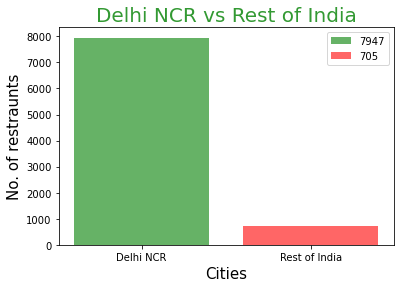

In [6]:
#The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.
#Problem 1.1 :
"""Answer : First I have filtered out all countries which is not having Country Code as 1.
Next I have made one set wherein I kept all the cities which are in Delhi-NCR which will help me to segregate. Next
thing I have done I have made one dictionary wherein I kept two keys, first one as Delhi_NCR and and second one as
Rest_of_India. Initially both of them are zero values. I have applied one function that is get_city which is helping me
to store the count. Inside the function I am checking whether city value present in the set if that is present, it means
that will count undered Delhi_NCR so I update Delhi_NCR count otherwise Rest_of_India. Eventually I will get the desire 
result in the cities_group_restaurant_count dictionary. One thing I have done, I have updated the name of the cities based
on Delhi_NCR or Rest_of_India to answer further questions. Made two separate lists one for the count and one for the keys.
After that I have plot in bar graph and we can see Delhi_NCR has the ample number of restaurant as compared to Rest_of_India.

"""
#Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
df1 = df[ (df['City']=='New Delhi') | (df['City']=='Ghaziabad') | (df['City']=='Noida') | (df['City']=='Gurgaon') |
         (df['City']=='Faridabad')]

total_city = df.City.count()
ncr_city = df1.City.count()
rest_city = total_city - ncr_city

x = ['Delhi NCR', 'Rest of India']
y = [ncr_city,rest_city]
plt.bar(x[0],y[0],color='g',alpha=0.6)
plt.bar(x[1],y[1],color='r',alpha=0.6)
plt.ylabel("No. of restraunts",size=15)
plt.xlabel("Cities",size=15)
plt.title('Delhi NCR vs Rest of India',fontsize=20, color='green',alpha=0.8)
plt.legend(y)
plt.show()

In [8]:
#Problem 1.2 :

#Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.
"""
Answer : With given dataset I have found four cuisine names where are not present in Delhi-NCR restaurants and they are
German Cajun Malwani BBQ but after checking with Zomato API I have found that some of them are present in Delhi-NCR
restaurants. So dataset have some missing data. 

NOTE: Combined Column is City_Cuisines from which I have figured out the data. And this column has been used for further questions. 

"""
df['City'].replace(['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad'],'Delhi NCR',inplace=True)

cuisines_NCR = df[df['City']=='Delhi NCR']['Cuisines'].str.split(', ')
set1=set()
for i in cuisines_NCR:
    set1.update(i)
    
cuisines_RI = df[df['City']!='Delhi NCR']['Cuisines'].str.split(', ')
set2 = set()
for i in cuisines_RI:
    set2.update(i)
    
print(set2-set1)

#{'BBQ', 'Cajun', 'German', 'Malwani'}

#Using Zomato API

import requests

header = {'user-key': '6eacc55f385ade30c93e9d0259691e14'}
data = {'city_id':'1'}
response = requests.get('https://developers.zomato.com/api/v2.1/cuisines',headers=header,params=data)
data = response.json()

set3 = set() 
for i in data['cuisines'] :
    set3.add(i['cuisine']['cuisine_name']) 
for i in set2-set1 :
    if i in set3:
        print(i)

#BBQ
#Malwani

#Conclusion : Dataset is incomplete because 'BBQ' and 'Malwani' Cuisines are served in Delhi-NCR .

{'BBQ', 'Malwani', 'German', 'Cajun'}
BBQ


In [10]:
#Problem 1.3 :

#Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.
"""
Answer: I have made one dictionary named cuisines_with_count wherein cuisine name works as the key and value is 
the count. I have made function inside which I am storing the the count for each cuisines depending upon their occurrence.
Once I got the values filled in the dictionary I have made one list of list and 0th column is for count and 1st column
is for the cuisine name. I have sorted the list based on the count and then I picked top 10. I after ploting on the
graph we can see the list as below.

Top ten cuisines that are being servered in Delhi-NCR and Rest of India are 
a. North Indian
b. Chinese
c. Fast Food
d. Mughlai
e. Bakery
f. Contental
g. Italian
h. South Indian
i. Cafe
j. Desserts
"""
#top 10 cuisines served by maximum number of restaurants in Delhi NCR
NCR = []
for i in cuisines_NCR:
    NCR.extend(i)
    
dct = {}
for i in NCR:
    dct[i] = dct.get(i,0) + 1
    
key1 = sorted(dct, key=dct.get, reverse=True)
print('***Top 10 cuisines served by maximum number of restaurants in Delhi NCR**********')
ncr_count = []
ncr_cname = []
for i in key1[:10]:
    print(i, dct[i])
    ncr_count.append(dct[i])
    ncr_cname.append(i)

#top 10 cuisines served by maximum number of restaurants in  rest of India
ROI = []
for i in cuisines_RI:
    ROI.extend(i)
    
dct1 = {}
for i in ROI:
    dct1[i] = dct1.get(i,0) + 1
    
key2 = sorted(dct1, key=dct1.get, reverse=True)
print('***Top 10 cuisines served by maximum number of restaurants in Rest of India**********')
roi_count = []
roi_cname = []
for i in key2[:10]:
    print(i, dct1[i])
    roi_count.append(dct1[i])
    roi_cname.append(i)

#***Top 10 cuisines served by maximum number of restaurants in Delhi NCR**********
#North Indian 3597
#Chinese 2448
#Fast Food 1866
#Mughlai 933
#Bakery 697
#South Indian 569
#Continental 547
#Desserts 542
#Street Food 538
#Italian 535
#***Top 10 cuisines served by maximum number of restaurants in Rest of India**********
#North Indian 349
#Chinese 242
#Continental 177
#Italian 147
#Cafe 136
#Fast Food 97
#South Indian 62
#Mughlai 59
#Desserts 55
#Mexican 50


***Top 10 cuisines served by maximum number of restaurants in Delhi NCR**********
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535
***Top 10 cuisines served by maximum number of restaurants in Rest of India**********
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


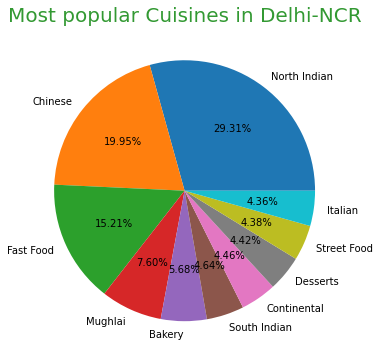

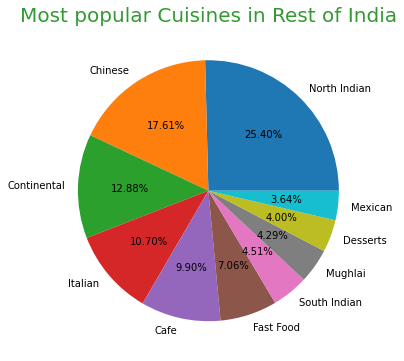

In [11]:
#Problem 1.4 :

#Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.
"""
Answer : From the graph we can see that North Indian, Chinese Cuisine are servered most in both places. But number of
restaurants serves has a huge difference, North Indian cuisinse is served by more than 3500 restaurants in Delhi NCR
but this data changes drastically in Rest of India, and that is only 350 or so and same goes for Chinese cuisine. 
Third most servered cuisine in Delhi NCR is Fast Food wherein Rest India is Continental and there is some order difference
in terms of restaurant serves. There are total 86 different cuisines that are offered in Delhi-NCR wherein Rest India offers
70 different cuisines.
NOTE: Here I have made an column by combining two columns as mentioned earlier. 
"""
#using ncr_count, ncr_cname, roi_count and roi_cname for plotting graph
plt.figure(figsize=(12,6))
plt.pie(ncr_count,labels=ncr_cname,autopct='%0.2f%%',radius=1)
plt.title('Most popular Cuisines in Delhi-NCR',fontsize=20, color='green',alpha=0.8)
plt.show()

plt.figure(figsize=(12,6))
plt.pie(roi_count,labels=roi_cname,autopct='%0.2f%%',radius=1)
plt.title('Most popular Cuisines in Rest of India',fontsize=20, color='green',alpha=0.8)
plt.show()

#Inference :

#   North Indian and Chinese Cuisines are most popular in Delhi-NCR and Rest of India.
#  Fast food and Mughlai are more popular in Delhi-NCR and Continental and Italian are more served in rest of the India.
# Overall number of restaurants registered with Zomato is much more in Delhi-NCR than Rest of India.
